# Experiment Overview: Free Trial Screener

At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials". If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.


In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. This screenshot shows what the experiment looks like.
<img src= "img/experiment_screenshot.png">


The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.


The unit of diversion is a cookie, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.

# Metric Choice
### Invariant Metric:
The unit of diversion of this experiment is a cookie, hence number of cookies should remain the same between control and experimental group. Also, the tendancy to start free trial should remain the same between 2 groups, so that we can quantify the effect of free trial screener. Hence, number of clicks of 'Start free trial' button should be an invariant metric too. Consequently, click through probability, which is a ratio between the above 2 metrics are also an invariant metric.

Here are the 3 invariant metrics in this experiment:

<font color = red>Number of cookies</font>: number of unique cookies to view the course overview page

<font color = red>Number of clicks</font>: number of unique cookies to click the "Start free trial" button

<font color = red>Click Through Probability</font>: number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page

### Evaluation Metric
Here is a funnel of a user behavior in this case:
1. click into course overview webpage (Pageviews)
2. click 'start free trial' button (Clicks)
3. control group: no free trial screener vs experimental group: a free trial screener
4. enroll and start free trial (Enrollments)
5. leave or remain in this course in free trial and pay (Payments)

In short, 2 effects are expected from a free trial screener: decreasing enrollments & unchanged payments

Here are the 3 evaluation metrics that are used in this experiment:

<font color = red>Gross conversion</font>: number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button.(dmin= 0.01)

<font color = red>Net conversion</font>: number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button.(dmin= 0.0075)

<font color = red>Retention</font>: number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout.(dmin= 0.01)


To launch this experiment, a result of decreasing gross conversion, unchanged net conversion and increasing retention is expected.

# Measuring Variability
Here contains rough estimates of the baseline values for these metrics. For each evaluation metric, an analytical estimate of standard deviation is calculated given a sample size of 5,000 cookies visiting the course overview page.

<img src = "img/baseline_value.png">

All of our evaluation metrics belong the type of probability hence binomial distributions are assumed. The following code is used to calculate an analytical estimate of standard deviation for a variable following a binomial distribution.

In [4]:
# import library
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

## show plot without calling a function
%matplotlib inline

## display option
from IPython.display import display
pd.options.display.max_rows = None    # show all rows
pd.options.display.max_columns = None    # show all columns

In [5]:
def std_binom(estimated_p, n):
    return np.sqrt(estimated_p * (1 - estimated_p) / n)

Given a sample size of 5,000 cookies visiting course overview page before experiment, the estimated gross conversion is 0.20625, n(click) is 5000*0.08 = 400.

The estimated net conversion is 0.1093125, n is 400.

The estimated retention is 0.53, n(enroll) is 5000 * 0.08 * 0.20625 = 82.5

In [35]:
print('std estimate of Gross conversion: ' + str(std_binom(0.20625, 400)))

std estimate of Gross conversion: 0.020230604137049392


In [36]:
print('std estimate of Net conversion: ' + str(std_binom(0.1093125, 400)))

std estimate of Net conversion: 0.01560154458248846


In [37]:
print('std estimate of Retention: ' + str(std_binom(0.53, 82.5)))

std estimate of Retention: 0.05494901217850908


Hence here are the analytical variability estimate for evaluation metrics:

1. <font color = 'red'>Gross conversion</font>: 0.0202
2. <font color = 'red'>Net conversion</font>: 0.0156
3. <font color = 'red'>Retention</font>: 0.0549

### Empirical Estimate 
For retention, an empirical estimate(Bootstrap sampling, or further A/A test) of variability may be needed, since the unit of metric is an user-id while the unit of diversion of the baseline estimate is a unique cookie.

# Sizing

### Choosing Number of Samples given Power
Given alpha = 0.05 and beta = 0.2, using the analytical estimates of variance, the number of pageviews in total for both groups are calculated for each evaluation metric. An online calculator <a href="https://www.evanmiller.org/ab-testing/sample-size.html">Sample Size Calculator</a> is recommended by Udacity for a two-sided test sample size calculation.

<img src = "img/baseline_tabular.png">

Given these baseline values and minimum detectable effect, here are the sample size needed for each metric.

##### <font color = 'red'>Gross conversion</font>
<img src = "img/sample_size_gc.png">

##### <font color = 'red'>Net conversion</font>
<img src = "img/sample_size_nc.png">

##### <font color = 'red'>Retention</font>
<img src = "img/sample_size_r.png">

The above results indicates that 27,413 samples are needed to click 'start free trial' button and 39,115 samples are needed to enrol and start free trial.

27,413 / click through probability * 2 = 27,413 / 0.08 * 2 = <font color = 'red'>685,325</font> pageviews are needed in total for both groups regarding to gross and net conversion.

39,115 / P(enroll | click) / P(click) * 2 = 39,115 / 0.20625 / 0.08 * 2 = 4,741,213 pageviews are needed in total regarding to retention. Since the estimated daily pageview is around 40k, if retention is to be used as evaluation metric, this experiment needs to run for more than 100 days, which is unrealistic. Hence, retention is dropped from evaluation metric.

### Choosing Duration vs Exposure
This experiment runs 23 days to collect pageviews and track clicks by cookies. Since payments happen after 14-day free trial, this experiment runs 37 days in total to track enrollments and payments by user-id in the last 14 days. Given 685,325 pageviews are needed in 23 days and an estimated daily 40,000 pageviews, 75% of traffic may be diverted to this experiment.

### Bonferroni Correction?
2 evaluation metrics are highly related, hence a bonferroni correction may lead to an overestimate of the probability of type 1 error and bonferroni correction is not used in this experiment.

# Analysis

In [6]:
control = pd.read_csv("data_control.csv")
experiment = pd.read_csv("data_experiment.csv")

In [40]:
control

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0
5,"Thu, Oct 16",9670,823,138.0,82.0
6,"Fri, Oct 17",9008,748,146.0,76.0
7,"Sat, Oct 18",7434,632,110.0,70.0
8,"Sun, Oct 19",8459,691,131.0,60.0
9,"Mon, Oct 20",10667,861,165.0,97.0


In [91]:
experiment

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0
5,"Thu, Oct 16",9500,788,129.0,61.0
6,"Fri, Oct 17",9088,780,127.0,44.0
7,"Sat, Oct 18",7664,652,94.0,62.0
8,"Sun, Oct 19",8434,697,120.0,77.0
9,"Mon, Oct 20",10496,860,153.0,98.0


Both control and experiment group have 37 days of Pageviews and Clicks and 23 days of Enrollments and Payments. The date in this dataset is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.

### Sanity Checks

Each cookie is assumed to be randomly assigned into control and experiment groups. Hence, a binomial distribution with p = 0.5 is assumed for Pageviews and Clicks, where a success is when a cookie is assigned to control group.

Click through probability is assumed to be the same for both groups. Hence, A t distribution for the difference in click through probability is assumed, where d = 0. Equal variance for both groups is assumed and a pooled variance estimate is used. 

If the observed probabilities and difference fall in 95% confidence interval, sanity check passes.

In [22]:
def sanity_check_binom(control, experiment, alpha = 0.05):
    """
    print result of a sanity check between control and experiment group, assuming true p = 0.5
    
    Input parameters:
        control: number of samples in control group
        experiment: number of samples in experiment group
        alpha: probability of a type 1 error, 0.05 by default
    
    Output values:
        1. confidence interval
        2. observed value
        3. result
    """
    
    # observed value
    obs = control/(control + experiment)
    
    # calculate CI
    Z = abs(stats.norm.ppf(alpha/2))
    SE = np.sqrt(0.5 * (1 - 0.5) / (control + experiment))
    upper = 0.5 + Z * SE
    lower = 0.5 - Z * SE
    
    # print result
    print('95% confidence interval: ' + str((round(lower, 4), round(upper, 4))))
    print('Observed value: ' + str(round(obs, 4)))
    
    if obs >= lower and obs <= upper:
        print('Pass!')
    else:
        print('Fail...')
        
def sanity_check_pooled_ttest(control, control_n, experiment, experiment_n, alpha = 0.05):
    """
    print result of pooled t test between control and experiment group, assuming true d = 0
    
    Input parameters:
        control: number of success events in control group
        control_n: total number of events in control group
        experiment: number of success events in experiment group
        experiment_n: total number of events in experiment group
        alpha: probability of type 1 error
        
    Output value:
        1. confidence interval
        2. observed value
        3. result
    """
    
    # observed value
    p_pooled = (control + experiment) / (control_n + experiment_n)
    obs = experiment/experiment_n - control/control_n
    
    # construct CI
    Z = abs(stats.norm.ppf(alpha/2))
    SE_pooled = np.sqrt(p_pooled * (1 - p_pooled) * (1/control_n + 1/experiment_n))
    upper = 0 + Z*SE_pooled
    lower = 0 - Z*SE_pooled
    
    # print result
    print('95% confidence interval: ' + str((round(lower, 4), round(upper, 4))))
    print('Observed value: ' + str(round(obs, 4)))
    
    if obs >= lower and obs <= upper:
        print('Pass!')
    else:
        print('Fail...')
        
def main_sanity_check():
    # calculate input parameters
    control = pd.read_csv("data_control.csv")
    experiment = pd.read_csv("data_experiment.csv")
    
    pageview_control = sum(control['Pageviews'])
    pageview_experiment = sum(experiment['Pageviews'])
    
    click_control = sum(control['Clicks'])
    click_experiment = sum(experiment['Clicks'])
    
    # Pageviews
    print('--------------------------------')
    print('Sanity Check for Pageviews')
    sanity_check_binom(pageview_control, pageview_experiment)
    print('--------------------------------\n')
    
    # Clicks
    print('--------------------------------')
    print('Sanity Check for Clicks')
    sanity_check_binom(click_control, click_experiment)
    print('--------------------------------\n')
    
    # Click Thru Probability
    print('--------------------------------')
    print('Sanity Check for CTP')
    sanity_check_pooled_ttest(click_control, pageview_control, click_experiment, pageview_experiment)
    print('--------------------------------')
    
    pass

In [23]:
main_sanity_check()

--------------------------------
Sanity Check for Pageviews
95% confidence interval: (0.4988, 0.5012)
Observed value: 0.5006
Pass!
--------------------------------

--------------------------------
Sanity Check for Clicks
95% confidence interval: (0.4959, 0.5041)
Observed value: 0.5005
Pass!
--------------------------------

--------------------------------
Sanity Check for CTP
95% confidence interval: (-0.0013, 0.0013)
Observed value: 0.0001
Pass!
--------------------------------


### Practical and Statistical Significance

A t-distribution with equal variance in control and experiment groups is assumed for the difference in gross and net conversion rate.

In [14]:
def effect_size_test_pooled_ttest(control, control_n, experiment, experiment_n, dmin, alpha = 0.05):
    """
    print result of pooled t test between control and experiment group
    
    Input parameters:
        control: number of success events in control group
        control_n: total number of events in control group
        experiment: number of success events in experiment group
        experiment_n: total number of events in experiment group
        alpha: probability of type 1 error
        
    Output value:
        1. confidence interval
        2. observed value
        3. result
    """
    
    # observed value
    p_pooled = (control + experiment) / (control_n + experiment_n)
    obs = experiment/experiment_n - control/control_n
    
    # construct CI
    Z = abs(stats.norm.ppf(alpha/2))
    SE_pooled = np.sqrt(p_pooled * (1 - p_pooled) * (1/control_n + 1/experiment_n))
    upper = obs + Z*SE_pooled
    lower = obs - Z*SE_pooled
    
    # statistical significance
    stat_sign = 'No'
    if 0 < lower or 0 > upper:
        stat_sign = 'Yes'
    
    # practical significance
    practical_sign = 'No'
    if (dmin < 0 and dmin > upper) or (dmin > 0 and dmin < lower):
        practical_sign = 'Yes'
    
    # print result
    print('95% confidence interval: ' + str((round(lower, 4), round(upper, 4))))
    print('Statistical significance: Is 0 out of the above confidence interval? ' + stat_sign)
    print('Minimum detectable effect: ' + str(dmin))
    print('Practical significance: Is minimum detectable effect out of the above confidence interval? ' + practical_sign)
    
def main_effect_size_test():
    # calculate input parameters
    control = pd.read_csv("data_control.csv")
    experiment = pd.read_csv("data_experiment.csv")
    
    control = control.dropna()
    experiment = experiment.dropna()
    
    enroll_control = sum(control['Enrollments'])
    click_control = sum(control['Clicks'])
    pay_control = sum(control['Payments'])
    
    enroll_experiment = sum(experiment['Enrollments'])
    click_experiment = sum(experiment['Clicks'])
    pay_experiment = sum(experiment['Payments'])
    
    # Gross conversion: from click to enroll
    print('--------------------------------')
    print('Effect size test for gross conversion')
    print('Hypothesis: GC_experiment - GC_control = 0')
    effect_size_test_pooled_ttest(enroll_control, click_control, enroll_experiment, click_experiment, -0.01)
    print('--------------------------------\n')
    
    # Net conversion: from click to pay
    print('--------------------------------')
    print('Effect size test for net conversion')
    print('Hypothesis: NC_experiment - NC_control = 0')
    effect_size_test_pooled_ttest(pay_control, click_control, pay_experiment, click_experiment, -0.0075)
    print('--------------------------------')

In [15]:
main_effect_size_test()

--------------------------------
Effect size test for gross conversion
Hypothesis: GC_experiment - GC_control = 0
95% confidence interval: (-0.0291, -0.012)
Statistical significance: Is 0 out of the above confidence interval? Yes
Minimum detectable effect: -0.01
Practical significance: Is minimum detectable effect out of the above confidence interval? Yes
--------------------------------

--------------------------------
Effect size test for net conversion
Hypothesis: NC_experiment - NC_control = 0
95% confidence interval: (-0.0116, 0.0019)
Statistical significance: Is 0 out of the above confidence interval? No
Minimum detectable effect: -0.0075
Practical significance: Is minimum detectable effect out of the above confidence interval? No
--------------------------------


The effect size test result for gross conversion implies that gross conversion is statistally significantlly lower in experiment group. The best case is gross conversion can reduce 1.2% in experiment group, which is more than minimum detectable effect 1%, hence the change is practically significant.

The effect size test result for net conversion implies that net conversion statistically remains unchanged in experiment group. The worst case is the net conversion may reduce 1.16%, which is more than minimum detectable effect 0.75%, hence in worst case, the loss in net conversion is practically significant.

### Sign Tests: Break Down Effects By Day

In [20]:
def vis_trend(df, day, control, exp, metric):
    plt.figure()
    plt.plot(df[day], df[control], label = 'control group')
    plt.plot(df[day], df[exp], label = 'experiment group')
    plt.legend()

    plt.xlabel('Day of Experiment')
    plt.ylabel(metric);
    plt.title('Trend of ' + metric)

def sign_test(df, day, control, exp, metric, alpha = 0.05, alternative = 'two-sided'):
    """
    Print p-value for a ranked-sum test, assuming no ties.
    
    Input parameters:
        df: dataframe name
        day: day column of sign test
        control: column name of control group
        exp: column name of experimental group
        alpha: probability of type 1 error
        alternative: type of test to perform, {'two-sided', less', 'greater'}
    
    Output value:
        p: estimated p-value of test
    """

    x = df[control]
    y = df[exp]
    
    # Visualization
    vis_trend(df, day, control, exp, metric)
    
    # compute parameters
    n = x.shape[0] - (x == y).sum()
    k = (x > y).sum() - (x == y).sum()

    # compute a p-value
    if alternative == 'two-sided':
        p = min(1, 2 * stats.binom(n, 0.5).cdf(min(k, n-k)))
    if alternative == 'less':
        p = stats.binom(n, 0.5).cdf(k)
    elif alternative == 'greater':
        p = stats.binom(n, 0.5).cdf(n-k)
    
    print('P-value: ' + str(round(p, 4)))
    print('Statistically significant? ' + str(p < 0.05))

def main_sign_test():
    # construct df needed for function including columns
    control = pd.read_csv("data_control.csv")
    experiment = pd.read_csv("data_experiment.csv")
    
    control = control.dropna()
    experiment = experiment.dropna()
    
    control['GC'] = control['Enrollments'] / control['Clicks']
    control['NC'] = control['Payments'] / control['Clicks']
    
    experiment['GC'] = experiment['Enrollments'] / experiment['Clicks']
    experiment['NC'] = experiment['Payments'] / experiment['Clicks']
    
    merge_df = pd.merge(control, experiment, on = 'Date', suffixes = ('_control', '_experiment'))
    merge_df['Day'] = range(0, merge_df.shape[0])
    print(merge_df.loc[:, ['Day', 'GC_control', 'GC_experiment', 'NC_control', 'NC_experiment']])
    
    # Gross Conversion
    print('--------------------------------')
    print('Sign Test for Gross Conversion')
    print('Hypothesis: P(control > experiment) = 0.5')
    sign_test(merge_df, 'Day', 'GC_control', 'GC_experiment', 'Gross Conversion')
    print('--------------------------------\n')
    
    # Net Conversion
    print('--------------------------------')
    print('Sign Test for Net Conversion')
    print('Hypothesis: P(control > experiment) = 0.5')
    sign_test(merge_df, 'Day', 'NC_control', 'NC_experiment', 'Net Conversion')
    print('--------------------------------')

    Day  GC_control  GC_experiment  NC_control  NC_experiment
0     0    0.195051       0.153061    0.101892       0.049563
1     1    0.188703       0.147771    0.089859       0.115924
2     2    0.183718       0.164027    0.104510       0.089367
3     3    0.186603       0.166868    0.125598       0.111245
4     4    0.194743       0.168269    0.076464       0.112981
5     5    0.167679       0.163706    0.099635       0.077411
6     6    0.195187       0.162821    0.101604       0.056410
7     7    0.174051       0.144172    0.110759       0.095092
8     8    0.189580       0.172166    0.086831       0.110473
9     9    0.191638       0.177907    0.112660       0.113953
10   10    0.226067       0.165509    0.121107       0.082176
11   11    0.193317       0.159800    0.109785       0.087391
12   12    0.190977       0.190031    0.084211       0.105919
13   13    0.326895       0.278336    0.181278       0.134864
14   14    0.254703       0.189836    0.185239       0.121076
15   15 

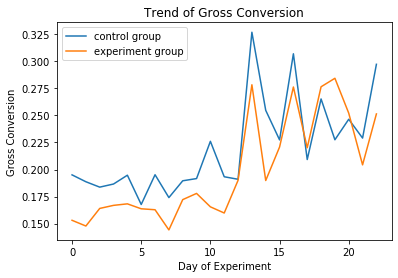

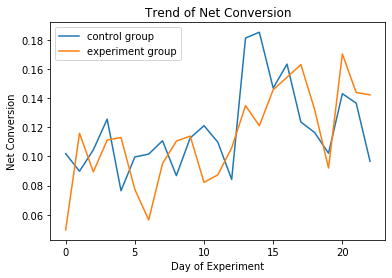

In [21]:
main_sign_test()

This result of sign test agrees with the result of effect size tests, that is, gross conversion tends to be higher in control group while net conversion is not significantly different between control and experiment group. From the above 2 plots, gross conversion tends to be higher in control group in most of the days while no obvious trend is found in the figure of net conversion.

### Summary and Recommendation
Free trial screener can statistically and practically reduce the number of students who leave during free trial period because they do not have enough time. The number of students who retend after 14 days statistically remains unchanged, but in worst case, a significant 1.16% drop in net conversion is possible. Hence, further tests and discussions are recommended to quantify whether we can afford 1.16% drop in net conversion, regarding to benefits including higher revenue after improving students' experience, and costs including loss in revenue due to drop in net conversion, costs to hire more coaches, etc.